<a href="https://colab.research.google.com/github/AggelosRDio/MscMachineLearning/blob/master/ML10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 10 - Clustering

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN


## Load and Preprocess Data

In [2]:
df = pd.read_csv("dataset.csv")

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Remove Columns

In [3]:
column_names = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']
df_backup = df.copy()
df = df.drop(columns=column_names)
df.head()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### One Hot Encoding for Genres

In [4]:
df_encoded = pd.get_dummies(df, columns=['track_genre'], prefix='genre')

df_encoded.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,False,False,False,False,False,False,False,False,False,False
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,False,False,False,False,False,False,False,False,False,False
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,False,False,False,False,False,False,False,False,False,False
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,False,False,False,False,False,False,False,False,False,False
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,False,False,False,False,False,False,False,False,False,False


## Normalize Features

In [5]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_encoded),
    columns=df_encoded.columns,
    index=df_encoded.index
)

## K-Means and SSE Calculation

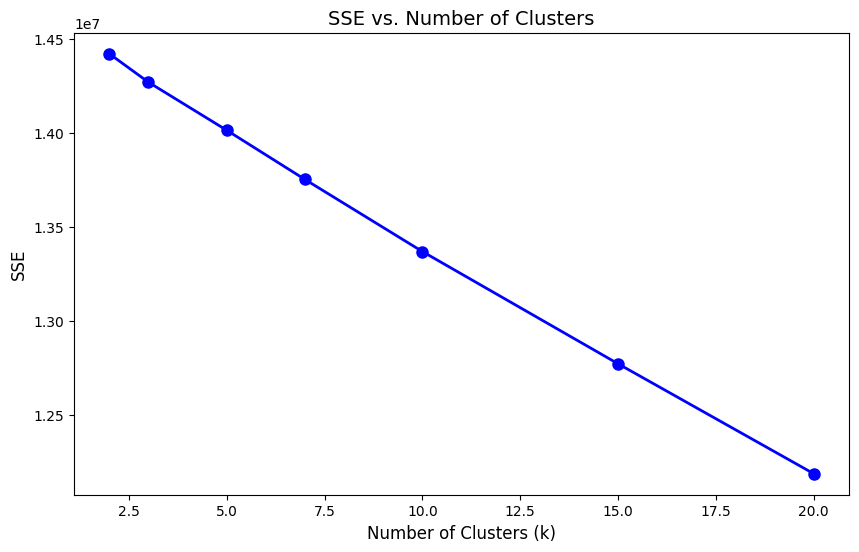

In [6]:
sse_values = []
k_values = [2, 3, 5, 7, 10, 15, 20]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    sse_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, 'bo-', linewidth=2, markersize=8)
plt.title('SSE vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('SSE', fontsize=12)
plt.show()


## Optimal K

Using the Elbow method there is no clear K value that can be spotted as optimal. For the shake of the exercise we'll use K=10

In [7]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

df_metadata = df_backup[column_names].copy()
df_metadata['cluster'] = labels
df['cluster'] = labels


## Dominant Genre Percentage Per Cluster

In [8]:
df_analysis = df_metadata.copy()
df_analysis['genre'] = df_backup['track_genre'].values

cluster_genre_analysis = []

for cluster_id in range(10):
  cluster_data = df_analysis[df_analysis['cluster'] == cluster_id]

  genre_counts = cluster_data['genre'].value_counts()
  dominant_genre = genre_counts.index[0]
  dominant_percentage = (genre_counts.iloc[0] / len(cluster_data)) * 100

  cluster_genre_analysis.append({
    'cluster': cluster_id,
    'dominant_genre': dominant_genre,
    'dominant_percentage': dominant_percentage
  })

df_genre_analysis = pd.DataFrame(cluster_genre_analysis)


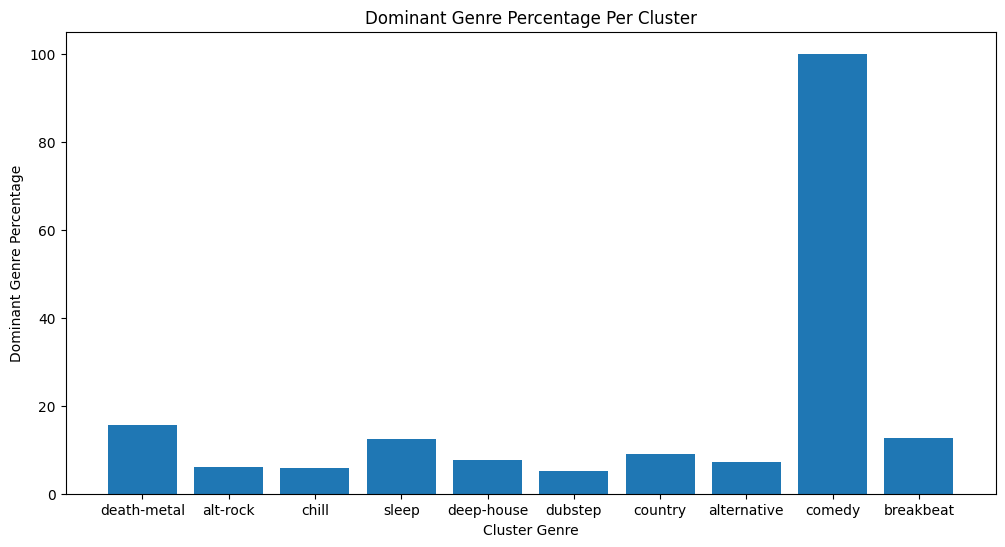

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(df_genre_analysis['dominant_genre'], df_genre_analysis['dominant_percentage'])
plt.xlabel('Cluster Genre')
plt.ylabel('Dominant Genre Percentage')
plt.title('Dominant Genre Percentage Per Cluster')
plt.xticks(df_genre_analysis['cluster'])
plt.show()

## Recommendation System Function

In [10]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

def recommend_songs(df_scaled, df_metadata, labels, distance_metric, song_name, num_recommendations=3):

  song_idx = df_metadata[df_metadata['track_name'] == song_name].index

  if len(song_idx) == 0:
    print(f"Song '{song_name}' not found in the dataset.")
    return None

  song_idx = song_idx[0]
  song_cluster = labels

  # get all songs in the same cluster
  cluster_indices = np.where(labels == song_cluster)[0]
  cluster_indices = cluster_indices[cluster_indices != song_idx]

  song_features = df_scaled.iloc[song_idx].values.reshape(1, -1)
  cluster_features = df_scaled.iloc[cluster_indices].values

  if distance_metric == 'euclidean':
    distances = euclidean_distances(song_features, cluster_features)[0]

  if distance_metric == 'cosine':
    distances = 1 - cosine_similarity(song_features, cluster_features)[0]

  top_indices = np.argsort(distances)[:num_recommendations]
  recommended_indices = cluster_indices[top_indices]

  recommended_songs = df_metadata.iloc[recommended_indices]


  return recommended_songs



## Recommendation System - Euclidean Distance

In [11]:
song = 'November Rain'
recommendations = recommend_songs(df_scaled, df_metadata, labels, 'euclidean', song)

for i, idx in enumerate(recommendations.index):
  print(f"{i + 1}. {df_metadata.loc[idx, 'track_name']} - {df_metadata.loc[idx, 'artists']}")

1. Estranged - Guns N' Roses
2. Free Bird - Lynyrd Skynyrd
3. Fade To Black - Remastered - Metallica


## Recommendation System - Cosine Similarity

In [12]:
recommendations = recommend_songs(df_scaled, df_metadata, labels, 'cosine', song)

for i, idx in enumerate(recommendations.index):
  print(f"{i + 1}. {df_metadata.loc[idx, 'track_name']} - {df_metadata.loc[idx, 'artists']}")

1. Estranged - Guns N' Roses
2. Free Bird - Lynyrd Skynyrd
3. Fade To Black - Remastered - Metallica


Based on the recommendations from both methods, the recommended songs are indeed very similar to the input song and fairly safe options to recommend to someone.

## DBSCAN Clustering

In [13]:
eps_values = [0.5, 1.0, 1.5, 2.0]

for eps in eps_values:
  dbscan = DBSCAN(eps=eps, min_samples=5)
  labels = dbscan.fit_predict(df_scaled)

  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)

  print(f"eps: {eps}, clusters: {n_clusters}, noise: {n_noise}")



eps: 0.5, clusters: 629, noise: 108561
eps: 1.0, clusters: 1160, noise: 99998
eps: 1.5, clusters: 1246, noise: 53963
eps: 2.0, clusters: 847, noise: 21300


In [14]:
optimal_eps = 2.0

dbscan = DBSCAN(eps=eps, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [15]:
recommendation = recommend_songs(df_scaled, df_metadata, labels, 'euclidean', song)
print(f"Euclidean Distance Recommendation: ")
for i, idx in enumerate(recommendations.index):
  print(f"{i + 1}. {df_metadata.loc[idx, 'track_name']} - {df_metadata.loc[idx, 'artists']}")

Euclidean Distance Recommendation: 
1. Estranged - Guns N' Roses
2. Free Bird - Lynyrd Skynyrd
3. Fade To Black - Remastered - Metallica


In [16]:
recommendation = recommend_songs(df_scaled, df_metadata, labels, 'cosine', song)
print(f"Cosine Similarity Recommendation: ")
for i, idx in enumerate(recommendations.index):
  print(f"{i + 1}. {df_metadata.loc[idx, 'track_name']} - {df_metadata.loc[idx, 'artists']}")

Cosine Similarity Recommendation: 
1. Estranged - Guns N' Roses
2. Free Bird - Lynyrd Skynyrd
3. Fade To Black - Remastered - Metallica


We can see that even DBSCAN recommends the same songs even though the many more clusters that DBSCAN creates, using both Euclidean distance and Cosine similarity

## DBSCAN++

In [17]:
!pip install git+https://github.com/jenniferjang/dbscanpp.git

  Cloning https://github.com/jenniferjang/dbscanpp.git to /tmp/pip-req-build-x_btox2t
  Running command git clone --filter=blob:none --quiet https://github.com/jenniferjang/dbscanpp.git /tmp/pip-req-build-x_btox2t
  Resolved https://github.com/jenniferjang/dbscanpp.git to commit e47d6d7361d7fb3b2dbe7731bffde5209d7c3011
  Preparing metadata (setup.py) ... done


In [18]:
from DBSCANPP import DBSCANPP

dbscanpp = DBSCANPP(p=0.3,eps_density=2.0,eps_clustering=2.0, minPts=5)
labels = dbscanpp.fit_predict(df_scaled.values)

n_clusters_dbscanpp = len(set(labels)) - (1 if -1 in labels else 0)

print(f"DBSCAN Clusters: {n_clusters}")
print(f"DBSCAN++ Clusters: {n_clusters_dbscanpp}")

DBSCAN Clusters: 847
DBSCAN++ Clusters: 5657


Using similar parameters DBSCAN++ seems to be performing worse, with approximately 6 times as many clusters created in 3 times as much time required for the clustering.

It is important to note that DBSCAN++ is also very heavily dependent on its parameters and is highly configurable, meaning that a different set of parameters could actually provide better or worse results.